In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data= pd.read_csv('car data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


In [4]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
cat_col = [x for x in data.columns if data[x].dtype=='O']
num_col = [x for x in data.columns if x not in cat_col]

In [7]:
cat_col

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [8]:
cat_col.remove('Car_Name')

In [9]:
for x in cat_col:
    print(data[x].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [10]:
num_col

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

In [11]:
data= pd.get_dummies(data, columns=cat_col, drop_first= True)

In [12]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,0,1


In [13]:
data['time'] = 2021- data['Year']

In [14]:
data.drop(['Year', 'Car_Name'], axis=1, inplace= True)

In [15]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,time
0,3.35,5.59,27000,0,0,1,0,1,7
1,4.75,9.54,43000,0,1,0,0,1,8
2,7.25,9.85,6900,0,0,1,0,1,4
3,2.85,4.15,5200,0,0,1,0,1,10
4,4.60,6.87,42450,0,1,0,0,1,7


In [16]:
num_col.remove('Year')

In [17]:
num_col.append('time')

In [18]:
num_col

['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'time']

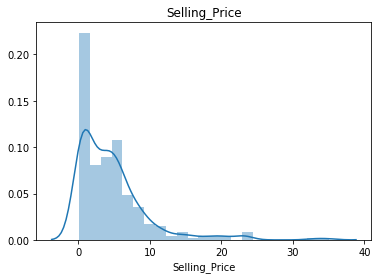

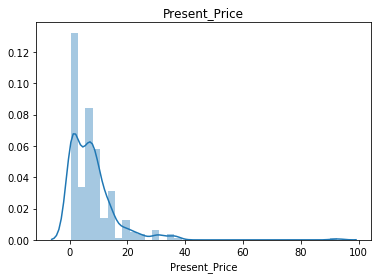

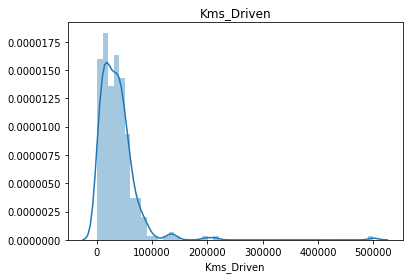

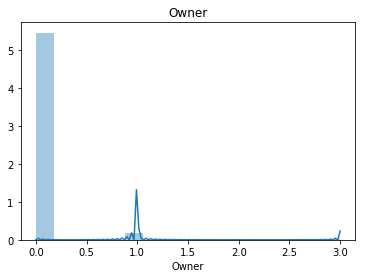

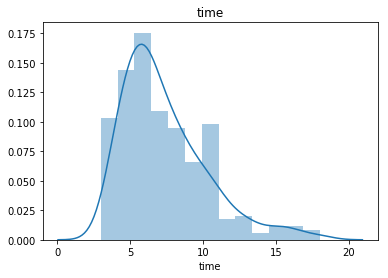

In [19]:
for i in num_col:
    sns.distplot(data[i])
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel='count'
    plt.show()

In [20]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,time
0,3.35,5.59,27000,0,0,1,0,1,7
1,4.75,9.54,43000,0,1,0,0,1,8
2,7.25,9.85,6900,0,0,1,0,1,4
3,2.85,4.15,5200,0,0,1,0,1,10
4,4.60,6.87,42450,0,1,0,0,1,7


In [21]:
x= data.iloc[:,1:]
y= data.iloc[:,0]

In [22]:
x.head()

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,time
0,5.59,27000,0,0,1,0,1,7
1,9.54,43000,0,1,0,0,1,8
2,9.85,6900,0,0,1,0,1,4
3,4.15,5200,0,0,1,0,1,10
4,6.87,42450,0,1,0,0,1,7


In [23]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [24]:
data[data['Selling_Price']==y.max()]

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,time
86,35.0,92.6,78000,0,1,0,0,1,11


In [25]:
from sklearn.ensemble import ExtraTreesRegressor
ec= ExtraTreesRegressor()
ec.fit(x,y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

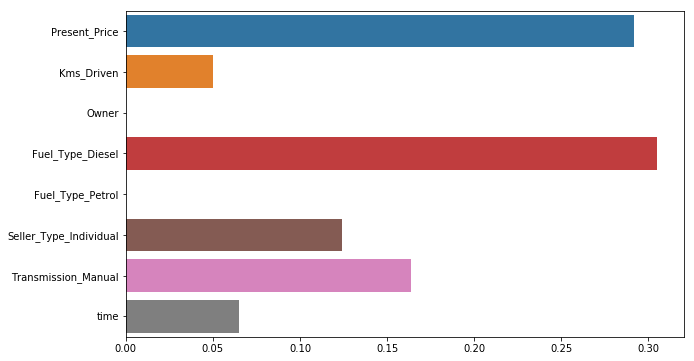

In [26]:
fig= plt.subplots(figsize=(10,6))
imp= pd.Series(ec.feature_importances_, index=x.columns)
sns.barplot(imp, imp.index)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [29]:
algos= {
        'Decision Tree Regressor' : {'model' : DecisionTreeRegressor(),
                                    'para' : {'criterion': ['mse', 'mae', 'friedman_mse'],
                                             'splitter': ['best', 'random'],'min_samples_split':[2,5,10,7]}
                                    },
        'Random Forest Regressor' : {'model' : RandomForestRegressor(),
                                     'para' :{'criterion' : ['mse', 'mae'],'max_depth' : [1,2,5,7],
                                              'n_estimators':[10,25,50,100,200,250,400,500],
                                              'max_features': ['auto', 'sqrt', 'log2']}
                                    }
        }

In [30]:
result=[]
from sklearn.model_selection import RandomizedSearchCV
for algo, param in algos.items():
    rs=  RandomizedSearchCV(param['model'], param['para'], n_iter= 5, cv=3, scoring='neg_mean_squared_error')
    rs.fit(x_train,y_train)
    ypred= rs.predict(x_test)
    result.append(pd.Series({'model': algo,
                            'score': rs.best_score_, 
                            'parameter': rs.best_params_}))

In [31]:
pd.options.display.max_colwidth=100
results = pd.concat(result, axis= 1).T.set_index('model')

In [32]:
results

,score,parameter
model,,
Decision Tree Regressor,-3.85897,"{'splitter': 'best', 'min_samples_split': 2, 'criterion': 'mae'}"
Random Forest Regressor,-4.34273,"{'n_estimators': 400, 'max_features': 'log2', 'max_depth': 7, 'criterion': 'mse'}"


In [33]:
rf2= RandomForestRegressor(n_estimators=25, max_features= 'auto', max_depth= 7, criterion= 'mse')
rf2.fit(x_train, y_train)
ypred2= rf2.predict(x_test)

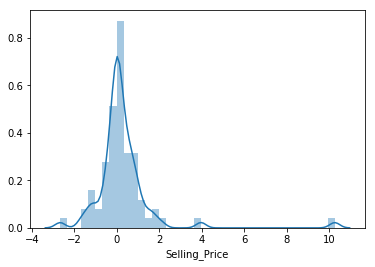

In [34]:
sns.distplot(y_test-ypred2)

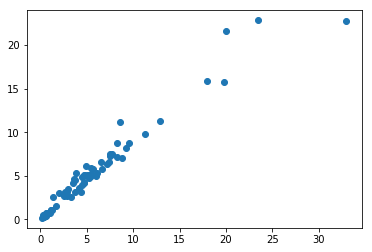

In [35]:
plt.scatter(y_test, ypred2)

In [36]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, ypred2))
print('MSE:', metrics.mean_squared_error(y_test, ypred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred2)))

MAE: 0.7031214401361406
MSE: 2.163712443462974
RMSE: 1.470956302363525


In [37]:
import pickle
pickle.dump(rf2,open('model.pkl','wb'))